# Generate Animation Frames for Sine Wave

This notebook demonstrates how to generate multiple frames of a sine wave with different phase shifts that can be used to create animations or presentations. Each frame shows the sine function with a progressive phase shift, creating a smooth animated effect when combined.

**Applications:**
- Creating animated plots for presentations
- Generating frames for LaTeX beamer animations
- Educational demonstrations of wave motion
- Time-series visualization

## Import Required Libraries

Import the necessary libraries for mathematical operations, plotting, and file path management.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

## Configure Matplotlib for LaTeX Compatibility

Set up matplotlib parameters to ensure compatibility with LaTeX documents and professional appearance.

In [2]:
# Update matplotlib parameters for LaTeX compatibility
mpl.rcParams.update({
    "pgf.rcfonts": False,         # don't override LaTeX fonts
    "text.usetex": True,          # LaTeX for all text
    "font.family": "serif",       # match your LaTeX doc
    "font.size": 18,              # will scale nicely in LaTeX
})

## Setup Output Directory

Create the output directory where all generated frames will be saved.

In [3]:
# Create output directory for frames
out = Path("latex/frames")
out.mkdir(exist_ok=True)

print(f"Output directory created: {out}")

Output directory created: latex/frames


## Generate Data and Animation Parameters

Define the x-axis values and phase shift parameters for creating the animation frames.

In [4]:
# Generate x values from 0 to 2π
x = np.linspace(0, 2 * np.pi, 400)

# Define animation parameters
num_frames = 121
phase_shifts = np.linspace(0, 2 * np.pi, num_frames)

print(f"Generating {num_frames} frames with phase shifts from 0 to 2π")
print(f"Phase step: {phase_shifts[1] - phase_shifts[0]:.4f} radians")

Generating 121 frames with phase shifts from 0 to 2π
Phase step: 0.0524 radians


## Generate Animation Frames

Create individual frames with progressive phase shifts of the sine wave. Each frame is saved as a separate PDF file.

In [5]:
# Generate 121 frames: phase shifts from 0 to 2π.
for i, phase in enumerate(phase_shifts):
    fig, ax = plt.subplots(figsize=(8, 6))  # ~column width
    
    # Plot sine wave with current phase shift
    ax.plot(
        x, np.sin(x + phase),
        label=rf"$\sin(x{('+' if phase>=0 else '')}{phase:.2f})$"
    )
    
    # Set labels and formatting
    ax.set_xlabel(r"$x$")
    ax.set_ylabel("Amplitude")
    ax.legend(loc="upper right")
    fig.tight_layout()
    
    # Save frame as PDF (vector format - preferred for quality)
    fig.savefig(out / f"sine_{i:03d}.pdf")
    
    # Alternative: save as PNG (raster format)
    # fig.savefig(out / f"sine_{i:03d}.png")
    
    plt.close(fig)
    
    # Progress indicator
    if (i + 1) % 20 == 0 or i == 0:
        print(f"Generated frame {i+1}/{num_frames}")

print(f"\nAll {num_frames} frames generated successfully!")
print(f"Files saved in: {out}")

Generated frame 1/121
Generated frame 20/121
Generated frame 20/121
Generated frame 40/121
Generated frame 40/121
Generated frame 60/121
Generated frame 60/121
Generated frame 80/121
Generated frame 80/121
Generated frame 100/121
Generated frame 100/121
Generated frame 120/121

All 121 frames generated successfully!
Files saved in: latex/frames
Generated frame 120/121

All 121 frames generated successfully!
Files saved in: latex/frames


## Preview a Sample Frame

Let's create and display one sample frame to see what the output looks like.

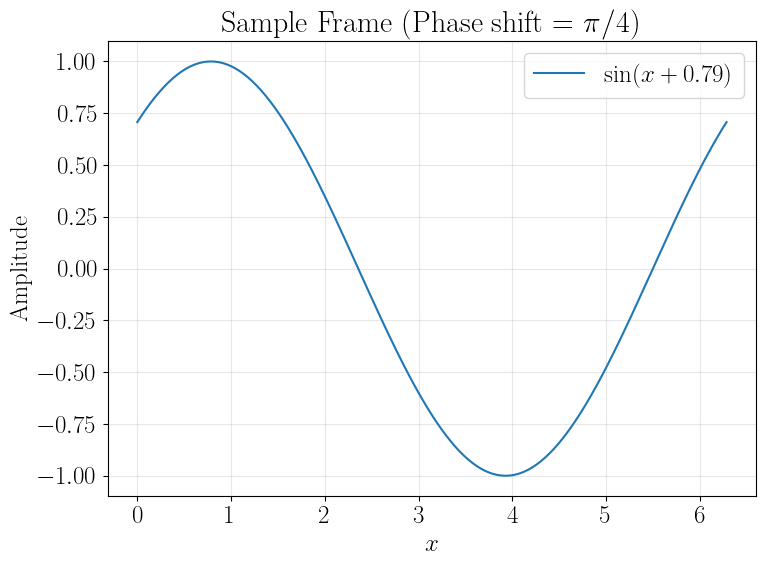

In [6]:
# Create a sample frame for preview
sample_phase = np.pi / 4  # 45 degrees phase shift

plt.figure(figsize=(8, 6))
plt.plot(x, np.sin(x + sample_phase), label=rf"$\sin(x + {sample_phase:.2f})$")
plt.xlabel(r"$x$")
plt.ylabel("Amplitude")
plt.legend()
plt.title(r"Sample Frame (Phase shift = $\pi/4$)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Creating Animations from Frames

Here are different ways to use the generated frames:

### 1. LaTeX Beamer Animation
```latex
\begin{frame}{Animated Sine Wave}
    \animategraphics[loop,controls,width=\textwidth]{10}{frames/sine_}{000}{120}
\end{frame}
```

### 2. Create GIF with ImageMagick
```bash
convert -delay 8 -loop 0 frames/sine_*.pdf sine_animation.gif
```

### 3. Create MP4 with FFmpeg
```bash
ffmpeg -framerate 15 -i frames/sine_%03d.pdf -c:v libx264 sine_animation.mp4
```

### 4. Python Animation (Alternative Method)
For direct Python animation, consider using `matplotlib.animation.FuncAnimation` for real-time animations.

**Frame Generation Benefits:**
- High-quality vector graphics (PDF format)
- Compatible with LaTeX presentations
- Can be converted to various animation formats
- Suitable for academic presentations and publications
- Frame-by-frame control for precise timing